# Helmet Safety Detection

## Pre-trained model inference (nano version)

### **1. Clone YOLOv10 source code**

In [1]:
# Install YOLOv10
!git clone https://github.com/THU-MIG/yolov10.git

Cloning into 'yolov10'...


### **2. Install the required packages**

In [2]:
# Install required libraries
%cd yolov10
%pip install -q -r requirements.txt
%pip install -e .

e:\AIO2024\AIO2024_Projects\Module_1\Helmet-Safety-Detection\yolov10


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement torch==2.0.1 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.5.0, 2.5.1, 2.6.0, 2.7.0, 2.7.1)
ERROR: No matching distribution found for torch==2.0.1


Obtaining file:///E:/AIO2024/AIO2024_Projects/Module_1/Helmet-Safety-Detection/yolov10
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for ultralytics (pyproject.toml): started
  Building editable for ultralytics (pyproject.toml): finished with status 'done'
  Created wheel for ultralytics: filename=ultralytics-8.1.34-0.editable-py3-none-any.whl size=21894 sha256=eaad96c1ea081ba735679718ac44aff5a5e15df3507571679b0309a5b25f46b2
  Stored in directory: C:\Users\admin\AppData\Local\Temp\pip-ephem-wheel-cache-tssigeai\wheels\03\e5\

### **3. Download pre-trained weight**

In [3]:
import requests

# Download the nano version: yolov10n.pt
url = "https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt"
response = requests.get(url)
with open("yolov10n.pt", "wb") as f:
    f.write(response.content)


### **4. Create YOLO model**

In [4]:
# Initialize the model
from ultralytics import YOLOv10
MODEL_PATH = 'yolov10n.pt'
model = YOLOv10(MODEL_PATH)
model.info()

YOLOv10n summary: 385 layers, 2775520 parameters, 2775504 gradients


(385, 2775520, 2775504, 0.0)

### **5. Run prediction with an image**

In [5]:
%cd ..
# Predict on image
img_before_path = './images/HCMC_Street.png'
result = model(source=img_before_path)[0]

# Save prediction result
img_after_path = './images/HCMC_Street_pre-trained_yolov10n_predict.png'
result.save(img_after_path)

e:\AIO2024\AIO2024_Projects\Module_1\Helmet-Safety-Detection


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]



image 1/1 e:\AIO2024\AIO2024_Projects\Module_1\Helmet-Safety-Detection\images\HCMC_Street.png: 448x640 8 persons, 2 bicycles, 1 car, 2 motorcycles, 1 backpack, 152.4ms
Speed: 5.8ms preprocess, 152.4ms inference, 13.2ms postprocess per image at shape (1, 3, 448, 640)


'./images/HCMC_Street_pre-trained_yolov10n_predict.png'

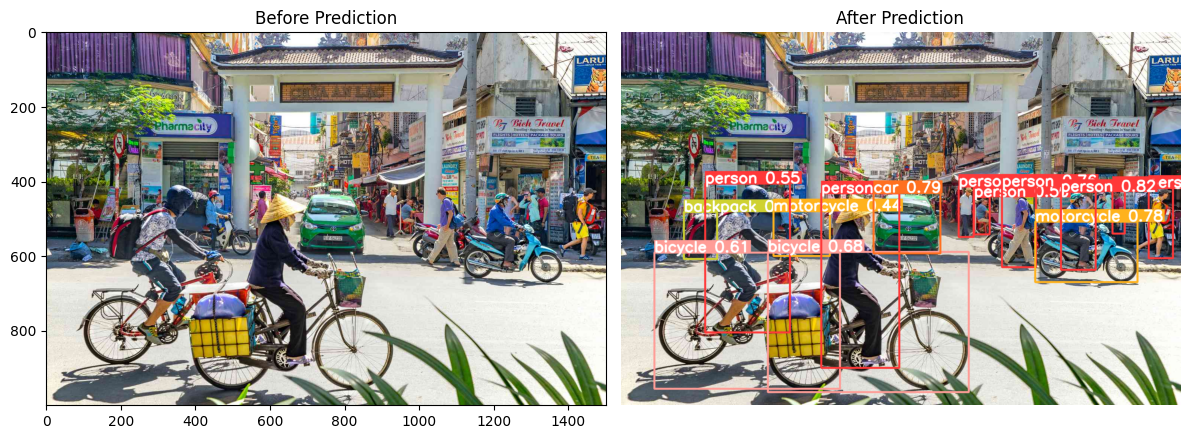

In [6]:
import matplotlib.pyplot as plt
import cv2

# Load the two images
img_before = cv2.imread(img_before_path)
img_after = cv2.imread(img_after_path)

# Convert BGR to RGB for correct color display in matplotlib
img_before_rgb = cv2.cvtColor(img_before, cv2.COLOR_BGR2RGB)
img_after_rgb = cv2.cvtColor(img_after, cv2.COLOR_BGR2RGB)

# Create a figure with 2 side-by-side subplots
plt.figure(figsize=(12, 6))  # Set the figure size

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img_before_rgb)
plt.title("Before Prediction")
# plt.axis("off")

# Image after prediction
plt.subplot(1, 2, 2)
plt.imshow(img_after_rgb)
plt.title("After Prediction")
plt.axis('off')

# Display the figure
plt.tight_layout()
plt.show()


## Fine-tuning the model

### **1. Download the dataset**

In [7]:
import gdown
import zipfile
import os

# Define the URL
file_id = "1twdtZEfcw4ghSZIiPDypJurZnNXzMO7R"
url = f"https://drive.google.com/uc?id={file_id}"

# Define the paths
output = "Safety_Helmet_Dataset.zip"
extract_dir = "safety_helmet_dataset"

# Download file
gdown.download(url, output, quiet=False)

# Extract file
os.makedirs(extract_dir, exist_ok=True)
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Remove zip file
os.remove(output)

Downloading...
From (original): https://drive.google.com/uc?id=1twdtZEfcw4ghSZIiPDypJurZnNXzMO7R
From (redirected): https://drive.google.com/uc?id=1twdtZEfcw4ghSZIiPDypJurZnNXzMO7R&confirm=t&uuid=daf38af3-81be-4cde-a256-c0171ab46b6e
To: e:\AIO2024\AIO2024_Projects\Module_1\Helmet-Safety-Detection\Safety_Helmet_Dataset.zip
100%|██████████| 33.7M/33.7M [00:05<00:00, 5.69MB/s]


### **2. Training the Model**

In [8]:
# Parameters of the model
YAML_PATH = './safety_helmet_dataset/data.yaml'
EPOCHS = 50
IMG_SIZE = 640
BATCH_SIZE = 64

In [9]:
# Train the model
model.train(data=YAML_PATH, epochs=EPOCHS, imgsz=IMG_SIZE, batch=BATCH_SIZE, save=True)

New https://pypi.org/project/ultralytics/8.3.152 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.12.3 torch-2.3.1+cpu CPU (AMD Ryzen 9 6900HS Creator Edition)
engine\trainer: task=detect, mode=train, model=yolov10n.pt, data=./safety_helmet_dataset/data.yaml, epochs=50, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False

train: Scanning E:\AIO2024\AIO2024_Projects\Module_1\Helmet-Safety-Detection\safety_helmet_dataset\train\labels... 761 images, 0 backgrounds, 0 corrupt: 100%|██████████| 761/761 [00:01<00:00, 550.70it/s]

train: New cache created: E:\AIO2024\AIO2024_Projects\Module_1\Helmet-Safety-Detection\safety_helmet_dataset\train\labels.cache



val: Scanning E:\AIO2024\AIO2024_Projects\Module_1\Helmet-Safety-Detection\safety_helmet_dataset\valid\labels... 218 images, 0 backgrounds, 0 corrupt: 100%|██████████| 218/218 [00:00<00:00, 563.68it/s]

val: New cache created: E:\AIO2024\AIO2024_Projects\Module_1\Helmet-Safety-Detection\safety_helmet_dataset\valid\labels.cache


Plotting labels to e:\AIO2024\AIO2024_Projects\Module_1\Helmet-Safety-Detection\yolov10\runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to e:\AIO2024\AIO2024_Projects\Module_1\Helmet-Safety-Detection\yolov10\runs\detect\train
Starting training for 50 epochs...

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       1/50         0G      2.952      3.876      3.215      2.543      5.976      2.831        290        640: 100%|██████████| 12/12 [04:19<00:00, 21.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.34s/it]

                   all        218        586    0.00024      0.055     0.0016   0.000585



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       2/50         0G      2.555      3.283      2.685      2.169      5.274      2.382        276        640: 100%|██████████| 12/12 [04:30<00:00, 22.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:36<00:00, 18.15s/it]

                   all        218        586      0.035      0.111     0.0301    0.00997



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       3/50         0G      2.198      2.438      2.205      1.888      4.566      1.977        268        640: 100%|██████████| 12/12 [05:12<00:00, 26.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:35<00:00, 17.87s/it]

                   all        218        586    0.00803      0.307     0.0383     0.0134



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       4/50         0G      1.975      2.072      1.972      1.743      4.118      1.775        271        640: 100%|██████████| 12/12 [05:14<00:00, 26.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:36<00:00, 18.15s/it]

                   all        218        586    0.00872      0.307     0.0622     0.0224



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       5/50         0G      1.835      1.815      1.849      1.654       3.63      1.659        257        640: 100%|██████████| 12/12 [05:13<00:00, 26.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:36<00:00, 18.16s/it]

                   all        218        586    0.00895      0.482      0.147     0.0629



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       6/50         0G      1.781      1.722      1.798      1.642      3.392      1.631        292        640: 100%|██████████| 12/12 [05:12<00:00, 26.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:36<00:00, 18.16s/it]

                   all        218        586       0.48      0.445      0.256      0.111



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       7/50         0G      1.708      1.625      1.734      1.577      3.066      1.583        240        640: 100%|██████████| 12/12 [05:27<00:00, 27.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:38<00:00, 19.45s/it]

                   all        218        586      0.868       0.13      0.301      0.153



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       8/50         0G       1.65      1.536      1.687      1.552      2.811      1.553        250        640: 100%|██████████| 12/12 [05:34<00:00, 27.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:39<00:00, 19.59s/it]

                   all        218        586      0.751      0.299      0.404      0.208



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       9/50         0G      1.632      1.488      1.671      1.542      2.581       1.56        275        640: 100%|██████████| 12/12 [05:37<00:00, 28.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:38<00:00, 19.46s/it]

                   all        218        586      0.773      0.363      0.525      0.254



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      10/50         0G      1.621      1.444      1.636      1.551      2.331      1.517        283        640: 100%|██████████| 12/12 [1:17:59<00:00, 389.92s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:30<00:00, 15.36s/it]

                   all        218        586      0.718      0.454      0.507      0.242



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      11/50         0G      1.592      1.378      1.605      1.531      2.146       1.49        278        640: 100%|██████████| 12/12 [04:22<00:00, 21.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:24<00:00, 12.40s/it]

                   all        218        586      0.787      0.407      0.534      0.271



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      12/50         0G      1.554      1.282      1.584      1.525      1.942      1.497        297        640: 100%|██████████| 12/12 [03:49<00:00, 19.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.51s/it]

                   all        218        586      0.634      0.575      0.631      0.295



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      13/50         0G      1.569      1.255      1.566      1.537      1.833       1.48        271        640: 100%|██████████| 12/12 [03:54<00:00, 19.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.66s/it]

                   all        218        586      0.649      0.604      0.656      0.334



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      14/50         0G      1.534      1.215       1.55      1.501      1.742      1.486        309        640: 100%|██████████| 12/12 [03:53<00:00, 19.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:26<00:00, 13.48s/it]

                   all        218        586      0.617      0.643      0.676      0.344



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      15/50         0G      1.525      1.171      1.541      1.506      1.637      1.475        269        640: 100%|██████████| 12/12 [03:52<00:00, 19.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:26<00:00, 13.49s/it]

                   all        218        586      0.656      0.665      0.682      0.346



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      16/50         0G      1.526      1.158       1.52      1.513      1.564      1.454        271        640: 100%|██████████| 12/12 [03:52<00:00, 19.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.60s/it]

                   all        218        586      0.753      0.676       0.74      0.361



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      17/50         0G      1.461      1.101      1.489      1.459      1.499      1.427        261        640: 100%|██████████| 12/12 [03:52<00:00, 19.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.55s/it]

                   all        218        586      0.633      0.596      0.671       0.34



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      18/50         0G      1.496      1.103      1.499      1.495      1.463      1.441        239        640: 100%|██████████| 12/12 [03:52<00:00, 19.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.54s/it]

                   all        218        586      0.625      0.679      0.705      0.344



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      19/50         0G      1.445      1.055      1.467      1.442       1.39      1.414        258        640: 100%|██████████| 12/12 [03:52<00:00, 19.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.53s/it]

                   all        218        586       0.73      0.608       0.68      0.316



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      20/50         0G      1.452      1.077      1.477      1.459      1.401      1.424        247        640: 100%|██████████| 12/12 [03:52<00:00, 19.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.65s/it]

                   all        218        586      0.751      0.623      0.739      0.376



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      21/50         0G      1.418      1.019      1.461       1.43      1.301      1.409        274        640: 100%|██████████| 12/12 [03:53<00:00, 19.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.71s/it]

                   all        218        586      0.718      0.695      0.732      0.355



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      22/50         0G      1.417       1.02      1.444      1.429      1.309      1.393        284        640: 100%|██████████| 12/12 [03:54<00:00, 19.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.56s/it]

                   all        218        586      0.658      0.735       0.72      0.351



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      23/50         0G      1.395     0.9685      1.427      1.422       1.22      1.385        269        640: 100%|██████████| 12/12 [03:52<00:00, 19.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.67s/it]

                   all        218        586      0.731      0.719      0.755      0.366



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      24/50         0G       1.41     0.9704       1.44      1.443      1.225      1.395        245        640: 100%|██████████| 12/12 [03:53<00:00, 19.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.53s/it]

                   all        218        586      0.682      0.775      0.797      0.403



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      25/50         0G      1.413     0.9824      1.451      1.431      1.227        1.4        221        640: 100%|██████████| 12/12 [03:53<00:00, 19.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.62s/it]

                   all        218        586      0.735      0.601      0.706      0.341



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      26/50         0G      1.375     0.9441       1.42      1.403      1.159      1.378        249        640: 100%|██████████| 12/12 [03:52<00:00, 19.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:26<00:00, 13.49s/it]

                   all        218        586      0.742      0.707      0.783      0.353



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      27/50         0G      1.384     0.9239      1.422      1.399      1.149       1.38        258        640: 100%|██████████| 12/12 [03:52<00:00, 19.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.61s/it]

                   all        218        586      0.765      0.698      0.787       0.39



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      28/50         0G      1.357     0.9307      1.398      1.389      1.152      1.357        255        640: 100%|██████████| 12/12 [03:51<00:00, 19.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.56s/it]

                   all        218        586      0.831       0.72      0.826      0.414



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      29/50         0G      1.344     0.8854      1.392      1.372      1.077      1.347        261        640: 100%|██████████| 12/12 [03:52<00:00, 19.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:26<00:00, 13.49s/it]

                   all        218        586      0.685      0.776      0.788      0.392



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      30/50         0G       1.35     0.8987      1.399      1.368      1.108      1.362        283        640: 100%|██████████| 12/12 [03:51<00:00, 19.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.62s/it]

                   all        218        586      0.757      0.775       0.83      0.411



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      31/50         0G      1.326     0.8863      1.391      1.358      1.099      1.355        299        640: 100%|██████████| 12/12 [03:52<00:00, 19.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.57s/it]

                   all        218        586       0.75      0.757       0.81      0.404



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      32/50         0G      1.329     0.8645      1.394       1.37      1.042      1.357        266        640: 100%|██████████| 12/12 [03:51<00:00, 19.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:26<00:00, 13.45s/it]

                   all        218        586      0.865      0.692      0.838      0.382



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      33/50         0G      1.325     0.8585       1.38       1.37       1.04      1.345        300        640: 100%|██████████| 12/12 [03:52<00:00, 19.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.51s/it]

                   all        218        586      0.835      0.751      0.826      0.405



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      34/50         0G      1.285     0.8399      1.349      1.328      1.024      1.322        286        640: 100%|██████████| 12/12 [03:52<00:00, 19.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.51s/it]

                   all        218        586      0.774      0.766      0.812      0.399



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      35/50         0G      1.291     0.8486      1.364      1.324      1.028      1.331        292        640: 100%|██████████| 12/12 [03:51<00:00, 19.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.60s/it]

                   all        218        586      0.827      0.722      0.834      0.421



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      36/50         0G       1.29     0.8293      1.356      1.336       1.01      1.327        252        640: 100%|██████████| 12/12 [03:52<00:00, 19.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:26<00:00, 13.50s/it]

                   all        218        586        0.8      0.774      0.839      0.406



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      37/50         0G      1.274     0.8147      1.344      1.324     0.9807      1.313        286        640: 100%|██████████| 12/12 [03:52<00:00, 19.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.61s/it]

                   all        218        586      0.806      0.772      0.833      0.419



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      38/50         0G      1.247     0.7966      1.331      1.285     0.9565        1.3        253        640: 100%|██████████| 12/12 [03:53<00:00, 19.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.55s/it]

                   all        218        586      0.809      0.732      0.829      0.417



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      39/50         0G      1.255     0.8045      1.342        1.3     0.9806      1.311        285        640: 100%|██████████| 12/12 [03:51<00:00, 19.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:26<00:00, 13.46s/it]

                   all        218        586      0.818      0.771       0.84      0.423



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      40/50         0G      1.235     0.7868      1.344       1.27      0.963      1.313        258        640: 100%|██████████| 12/12 [03:50<00:00, 19.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.52s/it]

                   all        218        586      0.831      0.748      0.833      0.411


Closing dataloader mosaic

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      41/50         0G      1.218     0.7063      1.331      1.255     0.7883      1.308        145        640: 100%|██████████| 12/12 [03:57<00:00, 19.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.30s/it]

                   all        218        586      0.768      0.777      0.813      0.421



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      42/50         0G      1.199     0.6558      1.323      1.239     0.7234      1.299        190        640: 100%|██████████| 12/12 [03:50<00:00, 19.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.54s/it]

                   all        218        586      0.772      0.777       0.82      0.419



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      43/50         0G      1.168     0.6225       1.31      1.207     0.6808      1.289        150        640: 100%|██████████| 12/12 [03:49<00:00, 19.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.58s/it]

                   all        218        586      0.756      0.784      0.828      0.418



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      44/50         0G      1.141     0.6239      1.295      1.169     0.6931      1.262        164        640: 100%|██████████| 12/12 [03:49<00:00, 19.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.60s/it]

                   all        218        586      0.775      0.816      0.838      0.428



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      45/50         0G      1.123     0.6123      1.267      1.163     0.6645      1.245        146        640: 100%|██████████| 12/12 [03:48<00:00, 19.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.66s/it]

                   all        218        586      0.829      0.749      0.825      0.422



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      46/50         0G      1.112     0.6051      1.267      1.151     0.6602       1.24        151        640: 100%|██████████| 12/12 [03:49<00:00, 19.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.56s/it]

                   all        218        586      0.805      0.779      0.825      0.418



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      47/50         0G      1.093     0.5852      1.242      1.129     0.6611      1.216        146        640: 100%|██████████| 12/12 [03:48<00:00, 19.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.59s/it]

                   all        218        586      0.821      0.785      0.847      0.433



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      48/50         0G        1.1     0.5897      1.259      1.139     0.6333      1.234        154        640: 100%|██████████| 12/12 [03:49<00:00, 19.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:26<00:00, 13.50s/it]

                   all        218        586      0.835      0.779      0.832      0.422



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      49/50         0G      1.078     0.5785      1.236      1.125     0.6146      1.217        150        640: 100%|██████████| 12/12 [03:48<00:00, 19.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:26<00:00, 13.47s/it]

                   all        218        586      0.814      0.794      0.836      0.427



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      50/50         0G      1.058     0.5639      1.225      1.094     0.6049      1.201        152        640: 100%|██████████| 12/12 [03:47<00:00, 18.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.51s/it]

                   all        218        586      0.806      0.767      0.829      0.422



50 epochs completed in 5.064 hours.
Optimizer stripped from e:\AIO2024\AIO2024_Projects\Module_1\Helmet-Safety-Detection\yolov10\runs\detect\train\weights\last.pt, 5.8MB
Optimizer stripped from e:\AIO2024\AIO2024_Projects\Module_1\Helmet-Safety-Detection\yolov10\runs\detect\train\weights\best.pt, 5.8MB

Validating e:\AIO2024\AIO2024_Projects\Module_1\Helmet-Safety-Detection\yolov10\runs\detect\train\weights\best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.12.3 torch-2.3.1+cpu CPU (AMD Ryzen 9 6900HS Creator Edition)
YOLOv10n summary (fused): 285 layers, 2695586 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.74s/it]


                   all        218        586       0.82      0.784      0.847      0.432
                  head        218         27      0.858      0.674      0.788      0.375
                helmet        218        285      0.811      0.873      0.905      0.452
                person        218        274      0.792      0.804      0.848       0.47
Speed: 1.3ms preprocess, 91.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to e:\AIO2024\AIO2024_Projects\Module_1\Helmet-Safety-Detection\yolov10\runs\detect\train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001AA826A1B50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          

### **3. Evaluating the Model**

In [10]:
# Initialize the trained model
TRAINED_MODEL_PATH = './yolov10/runs/detect/train/weights/best.pt'
trained_model = YOLOv10(TRAINED_MODEL_PATH)
trained_model.val(data=YAML_PATH, imgsz=IMG_SIZE, split='val')

Ultralytics YOLOv8.1.34 🚀 Python-3.12.3 torch-2.3.1+cpu CPU (AMD Ryzen 9 6900HS Creator Edition)
YOLOv10n summary (fused): 285 layers, 2695586 parameters, 0 gradients


val: Scanning E:\AIO2024\AIO2024_Projects\Module_1\Helmet-Safety-Detection\safety_helmet_dataset\valid\labels.cache... 218 images, 0 backgrounds, 0 corrupt: 100%|██████████| 218/218 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:19<00:00,  1.40s/it]


                   all        218        586       0.82      0.784      0.847      0.432
                  head        218         27      0.858      0.674      0.788      0.375
                helmet        218        285      0.811      0.873      0.905      0.452
                person        218        274      0.792      0.804      0.848       0.47
Speed: 1.2ms preprocess, 79.8ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to e:\AIO2024\AIO2024_Projects\Module_1\Helmet-Safety-Detection\yolov10\runs\detect\val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001AA89BE6C00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          

### **4. Run prediction with an image**

100%|██████████| 92.4k/92.4k [00:00<00:00, 676kB/s]


image 1/1 e:\AIO2024\AIO2024_Projects\Module_1\Helmet-Safety-Detection\Black-Workers-Need-a-Bill-of-Rights.jpeg: 448x640 2 helmets, 84.9ms
Speed: 2.8ms preprocess, 84.9ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)


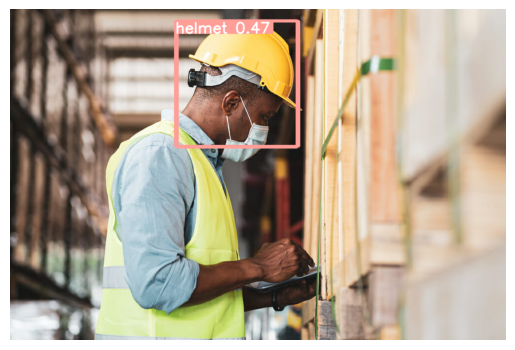

In [11]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt

IMAGE_URL = 'https://ips-dc.org/wp-content/uploads/2022/05/Black-Workers-Need-a-Bill-of-Rights.jpeg'
CONF_THRESHOLD = 0.3
results = trained_model.predict(source=IMAGE_URL,
                        imgsz=IMG_SIZE,
                        conf=CONF_THRESHOLD)
annotated_img = results[0].plot(show=False)

# Convert BGR to RGB for correct color display
annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)
plt.imshow(annotated_img_rgb)
plt.axis('off')
plt.show()